In [35]:
# (1) 데이터 가져오기

from sklearn.datasets import load_diabetes

dbt = load_diabetes()

In [2]:
# (2) 모델에 입력할 데이터 X 준비하기

df_X = dbt.data

import numpy as np

df_X = np.array(df_X)

In [3]:
# (3) 모델에 예측할 데이터 y 준비하기

df_y = dbt.target
df_y = np.array(df_y)

In [4]:
# (4) train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=1)

In [5]:
# (5) 모델 준비하기

W = np.random.rand(df_X.shape[1])
b = np.random.rand()

def model (X ,W, b):
    predictions = 0
    for i in range (df_X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
# (6) 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a-b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
# (7) 기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    N = len(W)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
# (8) 하이퍼 파라미터인 학습률 설정하기

LEARNING_RATE = 1

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 26960.9496
Iteration 20 : Loss 27422.5482
Iteration 30 : Loss 27931.4438
Iteration 40 : Loss 28453.3614
Iteration 50 : Loss 28986.4640
Iteration 60 : Loss 29530.7667
Iteration 70 : Loss 30086.4650
Iteration 80 : Loss 30653.7839
Iteration 90 : Loss 31232.9588
Iteration 100 : Loss 31824.2315
Iteration 110 : Loss 32427.8502
Iteration 120 : Loss 33044.0691
Iteration 130 : Loss 33673.1483
Iteration 140 : Loss 34315.3537
Iteration 150 : Loss 34970.9574
Iteration 160 : Loss 35640.2370
Iteration 170 : Loss 36323.4767
Iteration 180 : Loss 37020.9663
Iteration 190 : Loss 37733.0020
Iteration 200 : Loss 38459.8864
Iteration 210 : Loss 39201.9283
Iteration 220 : Loss 39959.4431
Iteration 230 : Loss 40732.7528
Iteration 240 : Loss 41522.1862
Iteration 250 : Loss 42328.0789
Iteration 260 : Loss 43150.7736
Iteration 270 : Loss 43990.6201
Iteration 280 : Loss 44847.9757
Iteration 290 : Loss 45723.2048
Iteration 300 : Loss 46616.6798
Iteration 310 : Loss 47528.7807
Iteration 320 : L

In [20]:
# (9) 모델 학습하기

LEARNING_RATE = 0.05

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2835.2483
Iteration 20 : Loss 2835.2480
Iteration 30 : Loss 2835.2477
Iteration 40 : Loss 2835.2474
Iteration 50 : Loss 2835.2471
Iteration 60 : Loss 2835.2468
Iteration 70 : Loss 2835.2466
Iteration 80 : Loss 2835.2463
Iteration 90 : Loss 2835.2460
Iteration 100 : Loss 2835.2457
Iteration 110 : Loss 2835.2454
Iteration 120 : Loss 2835.2451
Iteration 130 : Loss 2835.2448
Iteration 140 : Loss 2835.2445
Iteration 150 : Loss 2835.2442
Iteration 160 : Loss 2835.2439
Iteration 170 : Loss 2835.2437
Iteration 180 : Loss 2835.2434
Iteration 190 : Loss 2835.2431
Iteration 200 : Loss 2835.2428
Iteration 210 : Loss 2835.2425
Iteration 220 : Loss 2835.2422
Iteration 230 : Loss 2835.2419
Iteration 240 : Loss 2835.2416
Iteration 250 : Loss 2835.2414
Iteration 260 : Loss 2835.2411
Iteration 270 : Loss 2835.2408
Iteration 280 : Loss 2835.2405
Iteration 290 : Loss 2835.2402
Iteration 300 : Loss 2835.2399
Iteration 310 : Loss 2835.2397
Iteration 320 : Loss 2835.2394
Iteration 330 : L

In [21]:
# (10) test 데이터에 대한 성능 확인하기

loss(X_test, W, b, y_test)

2998.8760238357777

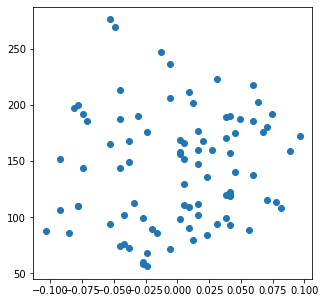

In [34]:
# (11) 정답 데이터와 예측한 데이터 시각화하기

import matplotlib.pyplot as plt

y_pred = model(X_test ,W, b)

plt.figure(figsize=(5,5))
plt.scatter(X_test[:,0], y_pred)
plt.show()